In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [107]:
data.shape

(12330, 18)

In [108]:
# Checking for NaN Values
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [109]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [110]:
col_l = []
for col in data.columns:
    col = col.replace(' ','_')
    col_l.append(col.lower())
data.columns = col_l
print(data.columns)

Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'productrelated', 'productrelated_duration',
       'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'month',
       'operatingsystems', 'browser', 'region', 'traffictype', 'visitortype',
       'weekend', 'revenue'],
      dtype='object')


In [111]:
data['month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: month, dtype: int64

Text(0.5, 1.0, 'Website Visitors Per Month')

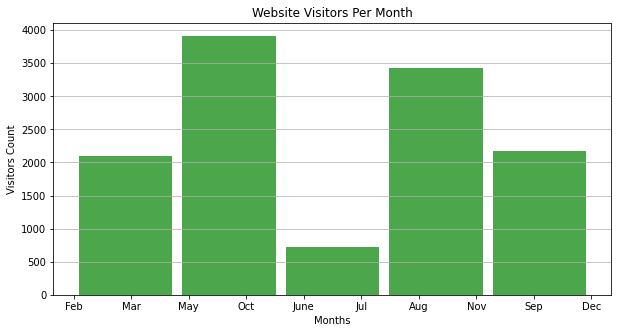

In [113]:
# customers['region'].hist()
plt.figure(figsize=(10,5)) 
n, bins, patches = plt.hist(x=data['month'], bins=5, color='green',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Months')
plt.ylabel('Visitors Count')
plt.title('Website Visitors Per Month')

In [11]:
data['revenue'].value_counts()

False    10422
True      1908
Name: revenue, dtype: int64

### Make a copy of data for use in Tableau visualization
    1.The original data set shall be used in finding corellations and possibly building a model
    2.Assign numbers in 'operatingsystems', 'browser' and 'region' actual values

In [12]:
data1 = data.copy()

### Mapping operating systems integers to values
### ASSUMPTIONS
    1.There are 8 different operting systems with a popularity trend similar to computers. Phones and tablets have a different popularity trend depending on the country
    2.The trends are not an exact match but will map them using their popularity rankings
    3. Could the various browsers being used indicate computer usage rather than phone/tablet?? Usually phone/tablet users would likely downlaod the app. Every user uses atleast a browser

### Link: https://en.wikipedia.org/wiki/Usage_share_of_operating_systems

In [14]:
data1['operatingsystems'] = data1['operatingsystems'].map({2:'Windows',1:'Mac OS', 3:'Linux',4:'Ubuntu', 5:'others',6:'others',7:'others',8:'Unix'})
data1['operatingsystems'].value_counts()

Windows    6601
Mac OS     2585
Linux      2555
Ubuntu      478
Unix         79
others       32
Name: operatingsystems, dtype: int64

In [15]:
# More grouping for operaing systems to get a flow chart
operating_sys = data1['operatingsystems'].map({'Ubuntu':'others', 'Unix':'others','Windows':'Windows','Mac OS':'Mac OS','Linux':'Linux'})
operating_sys.value_counts()

Windows    6601
Mac OS     2585
Linux      2555
others      557
Name: operatingsystems, dtype: int64

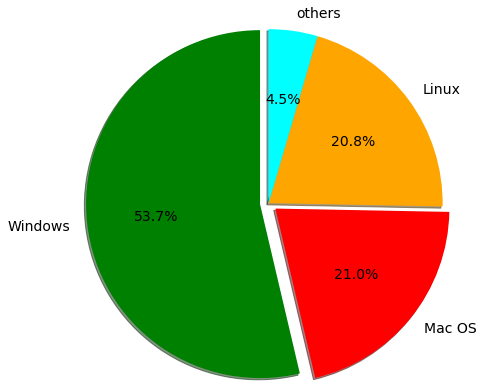

In [158]:
import matplotlib.pyplot as plt
fig = dict(operating_sys.value_counts())
colors = ['green', 'red', 'orange', 'cyan', 'yellow'] 
highlight =(0,0.2,0,0,0)
plt.pie(list(fig.values()), labels=fig.keys(), explode = (0.1, 0.1, 0, 0),colors=colors, autopct='%2.1f%%',
        shadow=True, startangle=90, radius = 2, textprops={'fontsize': 14})
plt.show()


In [17]:
# LINK TO BROWSER USAGE - Case of the European market: https://backlinko.com/browser-market-share
def clean_browser(x):
    if x == 2:
        return 'Chrome'
    elif x == 1:
        return 'Safari'
    elif x == 4:
        return 'Mozilla'
    elif x == 5:
        return 'Opera'
    elif x ==6:
        return 'Edge'
    elif x == 10:
        return 'Yandex'
    elif x == 8:
        return 'WebView'
    elif x == 3:
        return 'Samsung'
    else:
        return 'Others'

data1['browser'] = data1['browser'].apply(lambda x:clean_browser(x))
data1['browser'].value_counts()

Chrome     7961
Safari     2462
Mozilla     736
Opera       467
Edge        174
Yandex      163
WebView     135
Others      127
Samsung     105
Name: browser, dtype: int64

In [116]:
# More grouping to make a pie-chart
def piechart_filter(x):
    if x == 'Opera' or x == 'Edge':
        return 'Opera & Edge'
    elif x == 'Yandex' or x == 'WebView' or x == 'Others' or x == 'Samsung':
        return 'Others'
    else:
        return x
browser_chart = data1['browser'].apply(lambda x: piechart_filter(x))
browser_chart.value_counts()

Chrome          7961
Safari          2462
Mozilla          736
Opera & Edge     641
Others           530
Name: browser, dtype: int64

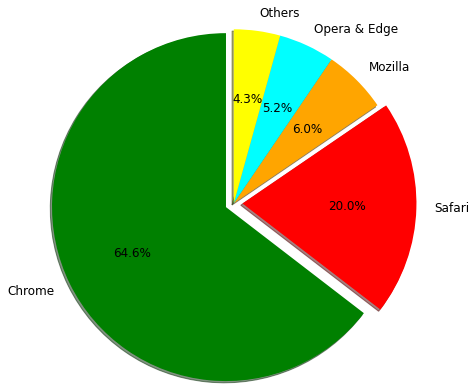

In [142]:
fig = dict(browser_chart.value_counts())
colors = ['green', 'red', 'orange', 'cyan', 'yellow'] 
highlight =(0,0.2,0,0,0)
plt.pie(list(fig.values()), labels=fig.keys(), explode = (0.1, 0.1, 0, 0,0),colors=colors, autopct='%2.1f%%',
        shadow=True, startangle=90, radius = 2, textprops={'fontsize': 12})
plt.show()

### The Visitors browser share follows a similar trend to the general browser market share
#### LINK TO BROWSER USAGE - Case of the European market: https://backlinko.com/browser-market-share

In [18]:
# Regions are totally abitrary because i do not know where the store is located
data1['region'] = data1['region'].map({1:'Central',2:'Northern', 3:'Eastern', 4:'Western',7:'Southern',6:'North-West',9:'North-East',
                                      8:'South-West',5:'South-East'})
data1['region'].value_counts()

Central       4780
Eastern       2403
Western       1182
Northern      1136
North-West     805
Southern       761
North-East     511
South-West     434
South-East     318
Name: region, dtype: int64

Text(0.5, 1.0, 'Visitors Per Region')

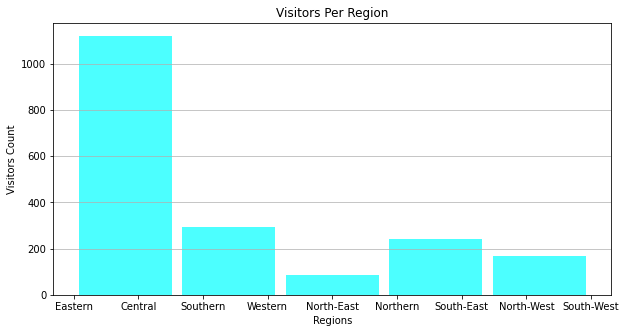

In [131]:
# customers['region'].hist()
plt.figure(figsize=(10,5)) 
n, bins, patches = plt.hist(x=customers['region'], bins=5, color= 'cyan',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Regions')
plt.ylabel('Visitors Count')
plt.title('Visitors Per Region')

In [19]:
# LINK: https://www.cyberclick.net/numericalblogen/types-of-web-traffic-sources-and-explanations
# Got the types of traffic from the above link. I did not consider the percentages because i do not know how our
# store generated most of its traffic

def clean_traffic(x):
    if x == 2:
        return 'Organic'
    elif x == 1:
        return 'Direct'
    elif x == 3:
        return 'Referral'
    elif x == 4:
        return 'Email marketing'
    elif x == 13:
        return 'Social networks'
    elif x == 10:
        return 'Paid media'
    elif x == 6:
        return 'Paid Search'
    elif x == 8:
        return 'Offline channels'    
    else:
        return 'Others'

data1['traffictype'] = data1['traffictype'].apply(lambda x:clean_traffic(x))
data1['traffictype'].value_counts()

Organic             3913
Direct              2451
Referral            2052
Email marketing     1069
Others               870
Social networks      738
Paid media           450
Paid Search          444
Offline channels     343
Name: traffictype, dtype: int64

Text(0.5, 1.0, 'Website Traffic classification')

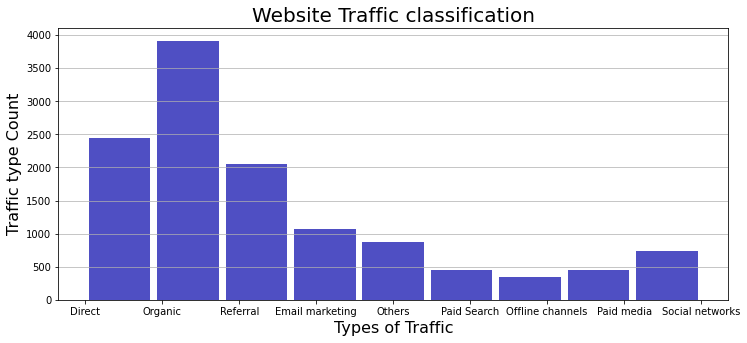

In [155]:
plt.figure(figsize=(12,5)) 
n, bins, patches = plt.hist(x=data1['traffictype'], bins=9, color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Types of Traffic', fontsize = 16)
plt.ylabel('Traffic type Count', fontsize = 16)
plt.title('Website Traffic classification' , fontsize = 20)

In [156]:
# # Plot
# fig, ax = plt.subplots(figsize = (12, 10))
# lead_artists = filtered_data.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(10)
# ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="nipy_spectral", orient="h", edgecolor='black', ax=ax)
# ax.set_xlabel('popularity', c='r', fontsize=16)
# ax.set_ylabel('artist', c='r', fontsize=16)
# ax.set_title('10 Most Popular Artists', c='r', fontsize=14, weight = 'bold')
# plt.show()


In [145]:
# # Plot
# fig, ax = plt.subplots(figsize = (12, 10))
# # lead_artists = filtered_data.groupby('artist')['popularity'].sum().sort_values(ascending=False).head(10)
# ax = sns.barplot(x=data1['traffictype'].values, y=data1['traffictype'], palette="nipy_spectral", orient="h", edgecolor='black', ax=ax)
# ax.set_xlabel('popularity', c='r', fontsize=16)
# ax.set_ylabel('artist', c='r', fontsize=16)
# ax.set_title('10 Most Popular Artists', c='r', fontsize=14, weight = 'bold')
# plt.show()


In [20]:
# People taht visited the website and did not buy anything are classified as visitors
visitors = data1[data1['revenue'] == False]
visitors.shape

(10422, 18)

In [21]:
# People taht visited the website and bought item(s) are classified as customers
customers = data1[data1['revenue'] == True]
customers.shape

(1908, 18)

In [22]:
# PERCENTAGE OF RETURNING VISITORS THAT CONVERTED - SPENT MONEY
percent_buy = len(customers)/len(data1)
print("Ratio of visitors that bought items ", round(percent_buy,2))

Ratio of visitors that bought items  0.15


In [23]:
# Use data where 'Revenue' is True
customers['visitortype'].value_counts()

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: visitortype, dtype: int64

In [24]:
data1.to_csv("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Mid-Term-Project\\Data\\Visitors.csv", index = False)

In [25]:
# Export dataframe where 'revenue' is True for use in Tableau
customers.to_excel("E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\Mid-Term-Project\\Data\\Customers.xlsx")

In [26]:
# Mothly Breakdown of customers that bought items 
customers['month'].value_counts()

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: month, dtype: int64

In [27]:
# Percentage of revenue from returning visitors
perc_return_customer_revenue = len(customers[customers['visitortype'] == 'Returning_Visitor'])/len(customers)
print("Ratio of returning customers that buy items: ", round(perc_return_customer_revenue, 2))

Ratio of returning customers that buy items:  0.77


In [28]:
# percentage of revenue from new visitors
perc_revenue_new_customer = len(customers[customers['visitortype'] == 'New_Visitor'])/len(customers)
print("Ratio of new customers that buy items: ", round(perc_revenue_new_customer, 2))

Ratio of new customers that buy items:  0.22


In [29]:
# Percentage of returning visitors that didnot buy
# We use the dataframe where 'revenue' is False
no_revenue_return_customer = len(visitors[visitors['visitortype'] == 'Returning_Visitor'])/len(visitors)
round(no_revenue_return_customer, 2)

0.87

In [30]:
# This percentage could be that returning customers simply make up a huge chunk of our website visitors
overall_return = len(data[data['visitortype'] == 'Returning_Visitor'])/len(data1)
print("Returning Customers Percentage: ", round(overall_return,2))

Returning Customers Percentage:  0.86


In [31]:
# from the above calculation, 85.5% of visitors are returning customers

In [32]:
# New customers
overall_new = len(data1[data1['visitortype'] == 'New_Visitor'])/len(data1)
print("New Customers Percentage: ", round(overall_new,2))

New Customers Percentage:  0.14


In [33]:
# Revenue on special days
special_days = data1[data1['specialday'] == 1]
special_days.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
20,0,0.0,0,0.0,8,136.166667,0.0,0.008333,0.000000,1.0,Feb,Windows,Chrome,South-East,Direct,Returning_Visitor,True,False
52,0,0.0,0,0.0,2,29.000000,0.0,0.100000,0.000000,1.0,Feb,Windows,Mozilla,Western,Organic,Returning_Visitor,True,False
78,0,0.0,0,0.0,1,0.000000,0.2,0.200000,0.000000,1.0,Feb,Mac OS,Safari,Central,Referral,Returning_Visitor,True,False
101,4,61.0,0,0.0,19,607.000000,0.0,0.026984,17.535959,1.0,Feb,Mac OS,Safari,Southern,Email marketing,Returning_Visitor,True,True
174,5,41.3,0,0.0,24,446.927778,0.0,0.008602,0.000000,1.0,Feb,Windows,Chrome,South-West,Direct,Returning_Visitor,True,False


In [34]:
percentage_of_special_day = len(special_days)/len(data1)
print("Ratio of visitors on special days: ",round(percentage_of_special_day,2) )

Ratio of visitors on special days:  0.01


In [35]:
special_revenue_perc = len(special_days[special_days['revenue'] == True])/len(special_days)
print("Ratio of revenue customers on special days: ",round(special_revenue_perc,2))

Ratio of revenue customers on special days:  0.06


### Only 6% of visitors on special day converted into revenue. This is much lower than the overall conversion rate of 15%

In [118]:
data1['weekend'].value_counts()

False    9462
True     2868
Name: weekend, dtype: int64

In [119]:
# Visitors over the weekend
weekend_visitors = data1[data1['weekend'] == True]
weekend_visitors.shape

(2868, 18)

In [39]:
percentage_of_weekend_visitors = len(weekend_visitors)/len(data1)
print("Ratio of weekend visitors: ", round(percentage_of_weekend_visitors,2))

Ratio of weekend visitors:  0.23


In [40]:
# Checking conversion ratios for both weekend and weekdays
# Getting weekend visitors that bought items
weekend_customers = weekend_visitors[weekend_visitors['revenue'] == True]
ratio_of_weekend_customers = len(weekend_customers)/len(weekend_visitors)
print("Ratio of weekend customers: ", round(ratio_of_weekend_customers,2))

Ratio of weekend customers:  0.17


In [41]:
# Ratios are similar between overall customer conversion rates and weekend customer conversion rates

In [42]:
# Visitors in weekdays
weekdays_visitors = data1[data1['weekend'] == False]
weekdays_visitors.shape

(9462, 18)

In [43]:
weekdays_customers = weekdays_visitors[weekdays_visitors['revenue'] == True]
weekdays_customers.shape

(1409, 18)

In [44]:
ratio_of_weekdays_customers = len(weekdays_customers)/len(weekdays_visitors)
print("Ratio of weekdays customers: ", round(ratio_of_weekdays_customers,3))

Ratio of weekdays customers:  0.149


In [45]:
# How many customers do we get by a 1% increase in visitors
extra_customers = 0.01 * 12330 * 0.15
print("Extra customers from a 1% increase in traffic: ", int(extra_customers))

Extra customers from a 1% increase in traffic:  18


In [46]:
# Because of data limitations, i can not tell whether the increase in customers is significant
# Since this is e-commerce, i will assume it is not so significant

## Checking if our store has special appeal to Mac users
### Reason:
1. Apple products users have relatively higher incomes compared to other groups
2. Being associated with users of such an exclusive product would be beneficial

In [50]:
mac_visitors = data1[data1['operatingsystems'] == 'Mac OS']
mac_visitors.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.00,0.20000,0.200000,0.0,0.0,Feb,Mac OS,Safari,Central,Direct,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.00,0.20000,0.200000,0.0,0.0,Feb,Mac OS,Chrome,Central,Others,Returning_Visitor,True,False
10,0,0.0,0,0.0,3,395.00,0.00000,0.066667,0.0,0.0,Feb,Mac OS,Safari,Eastern,Referral,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,Feb,Mac OS,Safari,Western,Referral,Returning_Visitor,False,False
12,0,0.0,0,0.0,7,280.50,0.00000,0.028571,0.0,0.0,Feb,Mac OS,Safari,Central,Referral,Returning_Visitor,False,False


In [51]:
mac_customers = data1[(data1['operatingsystems'] == 'Mac OS') & (data1['revenue'] == True)]
mac_customers.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,Mac OS,Safari,Southern,Email marketing,Returning_Visitor,True,True
276,4,15.000000,0,0.0,10,197.200000,0.000000,0.016667,38.990000,0.0,Mar,Mac OS,Safari,Central,Referral,Returning_Visitor,True,True
379,2,102.500000,3,60.0,22,1034.975000,0.000000,0.014000,16.143840,0.0,Mar,Mac OS,Safari,Western,Organic,Returning_Visitor,False,True
408,8,237.500000,4,142.0,30,1569.625000,0.000000,0.008108,15.889064,0.0,Mar,Mac OS,Chrome,Central,Others,Returning_Visitor,True,True
621,3,92.833333,0,0.0,24,463.816667,0.002667,0.015333,17.842307,0.0,Mar,Mac OS,Safari,Central,Organic,Returning_Visitor,False,True


In [52]:
perc_conversion_mac = len(mac_customers)/len(mac_visitors)
print("Cpnvertion ratio of MAC users: ", round(perc_conversion_mac,2))

Cpnvertion ratio of MAC users:  0.15


### Findings
1. The conversion rate for MAC OS is lower than the general store rate
2. Unfortunately, our store does not resonate with MAC users. This would have been a good niche for us to exploit

 ## Corellations between the various columns
 ### For this, I will use the original dataframe - data

In [53]:
# Get categorical columns
categorical = data.select_dtypes(object)
display(categorical.shape)
display(categorical.columns)

(12330, 2)

Index(['month', 'visitortype'], dtype='object')

In [55]:
# Encoding the month column
data['month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [56]:
data['month'] = data['month'].map({'Feb':2,'Mar':3,'May':5,'June':6, 'Jul':7, 'Aug':8,'Nov':11,'Sep':9,'Dec':12,'Oct':10})
data['month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

In [57]:
# Encoding the visitorType
data['visitortype'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [58]:
data['visitortype'] = data['visitortype'].map({'Returning_Visitor':1,'New_Visitor':2,'Other':3})
data['visitortype'].unique()

array([1, 2, 3], dtype=int64)

In [59]:
def boolean_clean(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return x
data['weekend'] = data['weekend'].apply(lambda x: boolean_clean(x))
data['revenue'] = data['revenue'].apply(lambda x: boolean_clean(x))
display(data['weekend'].unique())
display(data['revenue'].unique())

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [60]:
# Check if there are any categoricals left
categorical = data.select_dtypes(object)
display(categorical.shape)
display(categorical.columns)

(12330, 0)

Index([], dtype='object')

In [62]:
correlations_matrix = data.corr()
correlations_matrix

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.096713,-0.006347,-0.025035,-0.005487,-0.033561,0.016680,0.026417,0.138917
administrative_duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.057885,-0.007343,-0.015392,-0.005561,-0.014376,0.019120,0.014990,0.093587
informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.063500,-0.009527,-0.038235,-0.029169,-0.034491,-0.058211,0.035785,0.095200
informational_duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.044354,-0.009579,-0.019285,-0.027144,-0.024675,-0.045372,0.024078,0.070345
productrelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.156022,0.004290,-0.013146,-0.038122,-0.043064,-0.127916,0.016092,0.158538
productrelated_duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.137520,0.002976,-0.007380,-0.033091,-0.036377,-0.118273,0.007311,0.152373
bouncerates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.066562,0.023823,-0.015772,-0.006485,0.078286,-0.114916,-0.046514,-0.150673
exitrates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.095465,0.014567,-0.004442,-0.008907,0.078616,-0.152678,-0.062587,-0.207071
pagevalues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.067198,0.018508,0.045592,0.011315,0.012532,0.120077,0.012002,0.492569
specialday,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.256901,0.012652,0.003499,-0.016098,0.052301,-0.086854,-0.016767,-0.082305


In [63]:
data['revenue'].value_counts()

0    10422
1     1908
Name: revenue, dtype: int64

<AxesSubplot:>

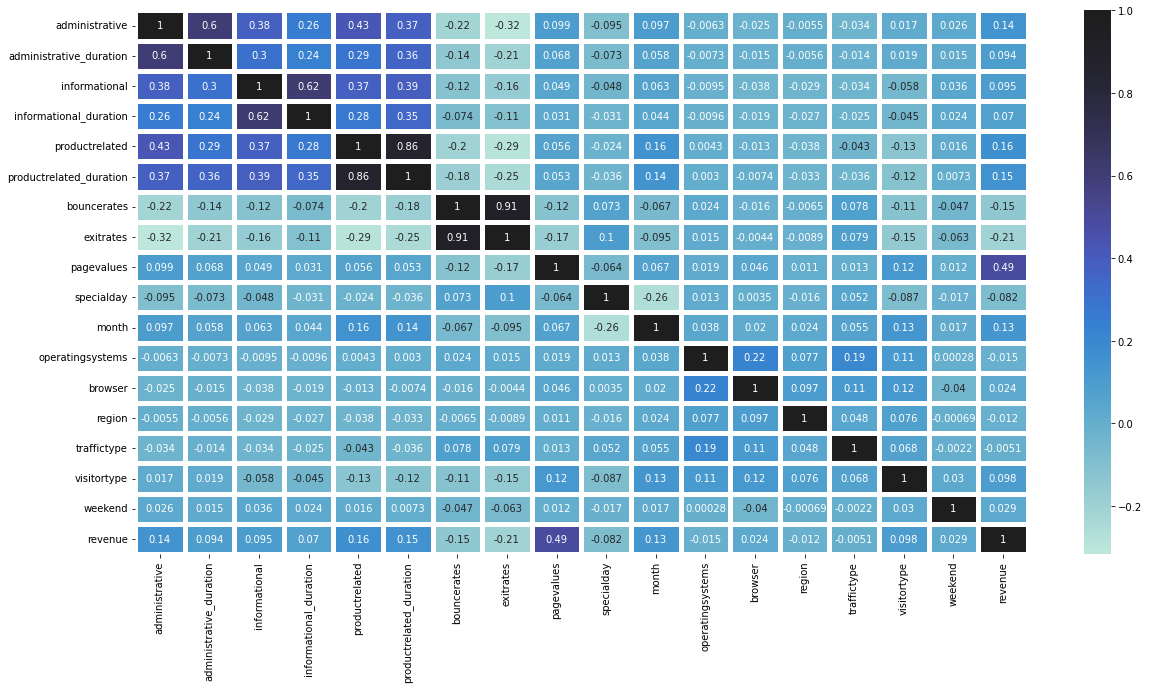

In [64]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(correlations_matrix, ax=ax, linewidth=3.1,annot=True,center=1)


In [65]:
# Combine the two column of administrative_duration and administrative
data['final_administrative'] = data['administrative_duration'] + data['administrative']
data = data.drop(['administrative_duration','administrative'], axis = 1)
# data.columns = ['informational', 'informational_duration', 'productrelated',
#        'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues',
#        'specialday', 'month', 'operatingsystems', 'browser', 'region',
#        'traffictype', 'visitortype', 'weekend', 'final_administrative','revenue']

data.columns
       

Index(['informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues',
       'specialday', 'month', 'operatingsystems', 'browser', 'region',
       'traffictype', 'visitortype', 'weekend', 'revenue',
       'final_administrative'],
      dtype='object')

In [66]:
#data['revenue'].value_counts()

In [67]:
data.shape

(12330, 17)

In [68]:
data['revenue'].value_counts()

0    10422
1     1908
Name: revenue, dtype: int64

In [69]:
final_visitors = data[data['revenue'] == 0]
final_visitors.shape

(10422, 17)

In [70]:
# FIlter out visitors and customers
final_customer = data[data['revenue'] == 1]
final_customer.shape

(1908, 17)

In [71]:
correlations_matrix = final_customer.corr()
correlations_matrix

,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,final_administrative
informational,1.000000,0.627955,0.337087,0.354347,0.018997,-0.035256,-0.136234,-0.024415,0.008114,-0.019335,-0.059427,-0.069373,-0.023969,-0.178028,-0.015132,NaN,0.290600
informational_duration,0.627955,1.000000,0.262400,0.295949,0.003795,-0.040650,-0.100227,0.011606,0.004104,-0.001243,-0.029496,-0.044048,-0.042399,-0.116505,0.002035,NaN,0.226263
productrelated,0.337087,0.262400,1.000000,0.907385,-0.031623,-0.153409,-0.177798,-0.053718,0.193657,0.006406,-0.045546,-0.095938,-0.063915,-0.236461,-0.033819,NaN,0.240286
productrelated_duration,0.354347,0.295949,0.907385,1.000000,-0.023473,-0.117584,-0.177121,-0.050065,0.176848,0.003826,-0.039924,-0.079437,-0.061015,-0.225469,-0.040393,NaN,0.292041
bouncerates,0.018997,0.003795,-0.031623,-0.023473,1.000000,0.737453,-0.154183,0.025174,0.057426,0.028927,0.002832,-0.029810,0.075912,-0.172275,-0.043630,NaN,-0.034987
exitrates,-0.035256,-0.040650,-0.153409,-0.117584,0.737453,1.000000,-0.230696,0.022216,0.065426,-0.026183,0.003704,-0.027982,0.056203,-0.191947,-0.039036,NaN,-0.086662
pagevalues,-0.136234,-0.100227,-0.177798,-0.177121,-0.154183,-0.230696,1.000000,-0.026021,-0.070637,0.078673,0.112523,0.061310,0.080345,0.234977,0.001172,NaN,-0.089272
specialday,-0.024415,0.011606,-0.053718,-0.050065,0.025174,0.022216,-0.026021,1.000000,-0.228710,0.006847,-0.001428,0.019334,-0.003780,-0.025910,-0.015062,NaN,-0.060616
month,0.008114,0.004104,0.193657,0.176848,0.057426,0.065426,-0.070637,-0.228710,1.000000,0.049745,0.030665,-0.027570,0.077051,0.045707,-0.044692,NaN,0.015425
operatingsystems,-0.019335,-0.001243,0.006406,0.003826,0.028927,-0.026183,0.078673,0.006847,0.049745,1.000000,0.309118,0.123341,0.199192,0.146804,-0.015769,NaN,-0.000331


<AxesSubplot:>

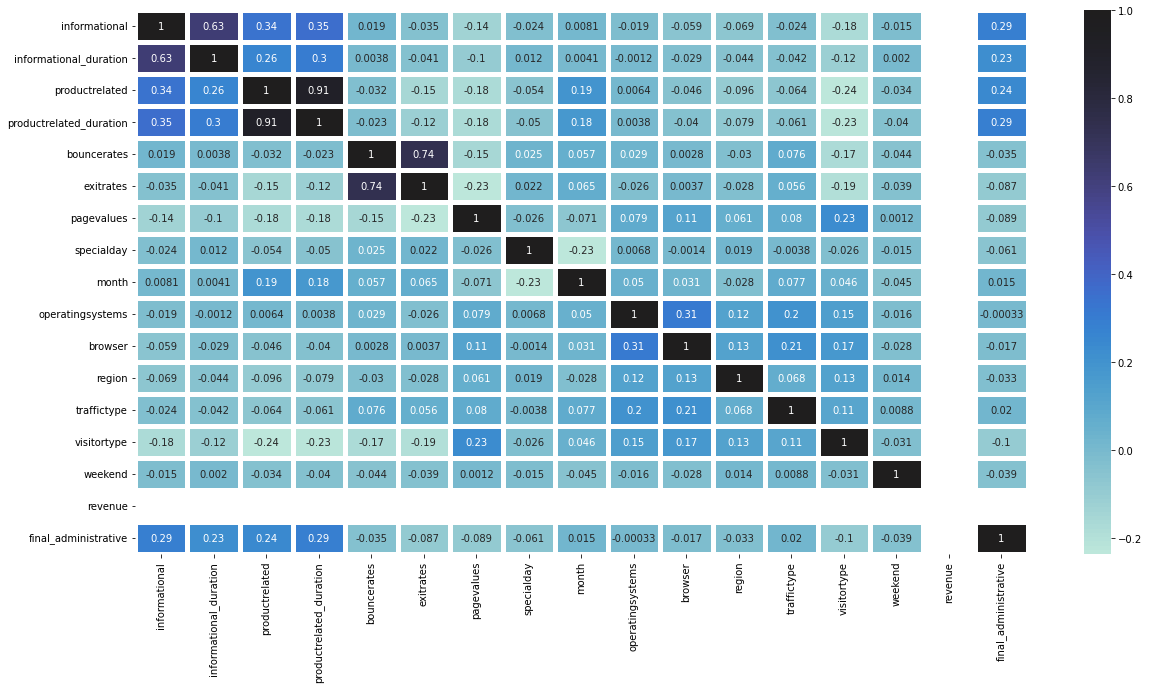

In [72]:
# import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(correlations_matrix, ax=ax, linewidth=3.1,annot=True,center=1)

## Our short-term strategy is to convert visitors into customers
#### Detailed analysis of the requirements to complete a transaction
#### Reason. Its possible that our checkout process discourages visitors from buying items

In [73]:
final_visitors = data[data['revenue'] == 0]
final_visitors.shape

(10422, 17)

In [74]:
final_customer.columns

Index(['informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues',
       'specialday', 'month', 'operatingsystems', 'browser', 'region',
       'traffictype', 'visitortype', 'weekend', 'revenue',
       'final_administrative'],
      dtype='object')

In [75]:
# Check if every customer spent some time on administrative tasks. 
final_admin_customers = final_customer[final_customer['final_administrative'] > 0]
final_admin_customers.shape

(1394, 17)

In [76]:
# Check if every customer spent some time on administrative tasks. 
final_admin1_customers = final_customer[final_customer['final_administrative'] <= 0]
final_admin1_customers.shape

(514, 17)

In [77]:
final_customer.shape

(1908, 17)

In [78]:
ratio = len(final_admin_customers)/len(final_customer)
print("Ratio of customers that spent time on the administrative page: ",round(ratio,3))

Ratio of customers that spent time on the administrative page:  0.731


In [79]:
# Median time spent on the administarative page by customers
# I am assuming time is in seconds
median_time = final_customer['final_administrative'].median()
median_time

55.416666665

### Compare the difference between the time new and returning customers spend on Administrative pages
#### Online stores with faster check out make more money

##### Link: https://www.bolt.com/resources/ecommerce-checkout-best-practices/
##### Link: https://techwireasia.com/2021/09/if-you-want-to-increase-sales-improve-your-checkout-experience-says-study/

In [80]:
# Check if all new customers spent time on the admin pages
new_customer = final_customer[final_customer['visitortype'] == 2]
new_customer.shape

(422, 17)

In [81]:
# New customers that spent time on administration pages
new_customers_admin = new_customer[new_customer['final_administrative'] > 0]
new_customers_admin.shape

(266, 17)

In [82]:
ratio = len(new_customers_admin)/len(new_customer)
print("Ratio of new customers that spent time on the admin pages: ",round(ratio,2))

Ratio of new customers that spent time on the admin pages:  0.63


In [83]:
non_admin_customers = final_customer[(final_customer['visitortype'] == 2) & (final_customer['final_administrative'] <= 0)]
non_admin_customers.shape

(156, 17)

In [84]:
return_customer = final_customer[final_customer['visitortype'] == 1]
return_customer.shape

(1470, 17)

In [85]:
return_customer['final_administrative'].describe().T

count    1470.000000
mean      134.472327
std       214.546196
min         0.000000
25%         1.000000
50%        63.208333
75%       173.525000
max      2094.750000
Name: final_administrative, dtype: float64

In [86]:
return_customers_admin = return_customer[return_customer['final_administrative'] > 0]
return_customers_admin.shape

(1118, 17)

In [87]:
ratio = len(return_customers_admin)/len(return_customer)
print("Ratio of returning customers that spent time on the admin pages: ",round(ratio,2))

Ratio of returning customers that spent time on the admin pages:  0.76


## Time spent on Administration pages: Conclusion
    1.Over 76% of returning customers visit the administration pages
    2.Returning customers spend more time on average (median) - 63.21 seconds than new customers -55.41 seconds on    administration pages
    3.Returning customers' information should be stored and auto-loaded on checkout
    4.Its possible that the returning customers were changing some information like credit card number or shipping address

In [88]:
return_visitors_admin = final_visitors[final_visitors['final_administrative'] > 0]
return_visitors_admin.shape

(5168, 17)

In [89]:
return_visitors_admin['final_administrative'].describe().T

count    5168.000000
mean      152.978026
std       220.268430
min         1.000000
25%        39.000000
50%        88.319444
75%       180.893750
max      3403.750000
Name: final_administrative, dtype: float64

In [90]:
percentage_of_return_visitors_admin = len(return_visitors_admin)/len(final_visitors)
print("Ratio of returning visitors that visited the admin pages",round(percentage_of_return_visitors_admin,3))

Ratio of returning visitors that visited the admin pages 0.496


In [91]:
# Getting pages that returning visitors went to
information_df = final_visitors[(final_visitors['informational_duration'] > 0) & (final_visitors['productrelated_duration'] == 0)]
information_df.shape

(7, 17)

In [92]:
# visitors to only information pages
information_df = final_visitors[(final_visitors['informational_duration'] > 0)]
information_df.shape

(1840, 17)

In [93]:
# Product pages only
product_related_df = final_visitors[(final_visitors['productrelated_duration'] > 0) & (final_visitors['informational_duration'] <= 0)]
product_related_df.shape

(7847, 17)

In [94]:
ratio = len(product_related_df)/len(final_visitors)
ratio

0.7529265016311648

In [95]:
product_related_df['productrelated_duration'].describe().T

count     7847.000000
mean       874.852433
std       1174.754641
min          0.500000
25%        170.000000
50%        470.000000
75%       1115.814102
max      13158.666670
Name: productrelated_duration, dtype: float64

In [96]:
# Visitors that visited both the products page and administrative pages
interest_visitors = final_visitors[(final_visitors['productrelated_duration'] > 0) & (final_visitors['final_administrative'] > 0)]
interest_visitors.shape
display(len(interest_visitors)/len(final_visitors))

0.49280368451352907

In [97]:
interest_customers = final_customer[(final_customer['productrelated_duration'] > 0) & (final_customer['final_administrative'] > 0)]
display(interest_customers.shape)
display(len(interest_customers)/len(final_customer))

(1383, 17)

0.7248427672955975

In [98]:
interest_customers[['productrelated_duration','final_administrative']].describe().T

,count,mean,std,min,25%,50%,75%,max
productrelated_duration,1383.0,2157.794707,2541.199448,5.0,673.037500,1279.089286,2607.351136,27009.85943
final_administrative,1383.0,169.323557,221.914601,1.0,45.266667,95.000000,207.216667,2094.75000


In [99]:
interest_visitors[['productrelated_duration','final_administrative']].describe().T

,count,mean,std,min,25%,50%,75%,max
productrelated_duration,5136.0,1535.348081,2267.444432,4.0,359.9075,871.833333,1889.395833,63973.52223
final_administrative,5136.0,153.575066,220.638663,1.0,39.0750,89.000000,181.000000,3403.75000


## Visitors summary

    1.Visitors spend an average of approximately 15 minutes on product pages only. This is more than enough time to convince them
    2.Customers spend about 36 minutes on the website. I think the targeting algorithm need improvement
    3.About 50% of visitors visited both the information and administration pages
    4.Visitors spend about 10X more time on the products related pages than administrative pages

## Relationship between time spent on product related pages and revenue
### H0 ==> The higher the time visitors spend on the page, the higher the revenue

In [100]:
data_crosstab = pd.crosstab(data['productrelated_duration'], data['revenue'], margins = False)
data_crosstab

revenue,0,1
productrelated_duration,,
0.000000,742,13
0.500000,1,0
1.000000,2,0
2.333333,1,0
2.666667,1,0
...,...,...
24844.156200,1,0
27009.859430,0,1
29970.465970,1,0


In [101]:
import scipy.stats as st
st.chi2_contingency(data_crosstab)

(11261.594166576731,
 5.129549976526522e-32,
 9550,
 array([[6.38167883e+02, 1.16832117e+02],
        [8.45255474e-01, 1.54744526e-01],
        [1.69051095e+00, 3.09489051e-01],
        ...,
        [8.45255474e-01, 1.54744526e-01],
        [8.45255474e-01, 1.54744526e-01],
        [8.45255474e-01, 1.54744526e-01]]))

## H0 hypothesis is correct
### The product related duration is highly correlated to the revenue ie The more time visitors spend on products
### page the higher the chances of converting them into customers